In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import itertools 
from collections import Counter 
from time import sleep
from auth_data import token

from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             mean_squared_log_error, median_absolute_error,
                             r2_score, mean_absolute_percentage_error)

In [2]:
from utility.parsing import (get_post_data, get_posts, 
                             write_json, get_likes)
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\Роман\AppData\Local\Temp\ipykernel_324\82325636.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
posts = pd.read_json('data/posts_5000.json')

In [5]:
posts.head(3)

,id,owner_id,date,text,likes,reposts,attachments,marked_as_ads
0,132780,-194512826,2022-08-01 20:59:16,Наш лукбук на август!\n\nМы собрали универсаль...,521,196,"[{'type': 'photo', 'photo': {'album_id': 28711...",0
1,133540,-194512826,2022-08-10 10:03:00,несмотря на то что в детстве тебя гнобили и ун...,103,9,"[{'type': 'photo', 'photo': {'album_id': 27455...",0
2,133527,-194512826,2022-08-10 08:03:00,что-то не на рукожопском,359,55,"[{'type': 'photo', 'photo': {'album_id': 27455...",0


In [6]:
likes = pd.read_json('data/likes_5000.json')

In [7]:
likes = likes.T

In [8]:
likes.rename(columns={0:'likes_id'}, inplace=True)
likes.likes_id

132780    [272301594, 684198901, 557160612, 401227645, 6...
133540    [410793517, 616126528, 560812373, 417061866, 4...
133527    [84261400, 608143054, 386867124, 467120708, 49...
133520    [539309607, 698827901, 612743278, 695332193, 5...
133517    [348806758, 586377905, 371947448, 612743278, 4...
                                ...                        
101107    [119762390, 135379665, 142625120, 147378685, 1...
101096    [23426190, 43549117, 64792882, 65158804, 68471...
101089    [15940170, 57638446, 168711934, 175500238, 197...
101084    [57638446, 96134138, 140293734, 144128826, 152...
101077    [57638446, 68471495, 140293734, 144128826, 181...
Name: likes_id, Length: 5000, dtype: object

In [9]:
likes

,likes_id
132780,"[272301594, 684198901, 557160612, 401227645, 6..."
133540,"[410793517, 616126528, 560812373, 417061866, 4..."
133527,"[84261400, 608143054, 386867124, 467120708, 49..."
133520,"[539309607, 698827901, 612743278, 695332193, 5..."
133517,"[348806758, 586377905, 371947448, 612743278, 4..."
...,...
101107,"[119762390, 135379665, 142625120, 147378685, 1..."
101096,"[23426190, 43549117, 64792882, 65158804, 68471..."
101089,"[15940170, 57638446, 168711934, 175500238, 197..."
101084,"[57638446, 96134138, 140293734, 144128826, 152..."


In [10]:
posts = posts.set_index('id').join(likes)

In [11]:
posts

,owner_id,date,text,likes,reposts,attachments,marked_as_ads,likes_id
id,,,,,,,,
132780,-194512826,2022-08-01 20:59:16,Наш лукбук на август!\n\nМы собрали универсаль...,521,196,"[{'type': 'photo', 'photo': {'album_id': 28711...",0,"[272301594, 684198901, 557160612, 401227645, 6..."
133540,-194512826,2022-08-10 10:03:00,несмотря на то что в детстве тебя гнобили и ун...,103,9,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[410793517, 616126528, 560812373, 417061866, 4..."
133527,-194512826,2022-08-10 08:03:00,что-то не на рукожопском,359,55,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[84261400, 608143054, 386867124, 467120708, 49..."
133520,-194512826,2022-08-10 07:03:01,такую только на руки и сразу в загс,189,12,"[{'type': 'photo', 'photo': {'album_id': 28226...",0,"[539309607, 698827901, 612743278, 695332193, 5..."
133517,-194512826,2022-08-10 06:03:00,едете с друзьями в санаторий с джакузи и кисло...,179,23,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[348806758, 586377905, 371947448, 612743278, 4..."
...,...,...,...,...,...,...,...,...
101107,-194512826,2021-06-11 12:05:00,Милые платья 🦄\n\n•ссылки под фото•,110,21,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[119762390, 135379665, 142625120, 147378685, 1..."
101096,-194512826,2021-06-11 11:03:00,твоя комната как фото из пинтереста\n\n•ссылки...,855,129,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[23426190, 43549117, 64792882, 65158804, 68471..."
101089,-194512826,2021-06-11 10:07:00,милый топ с китти💓\n\n•ссылка под первым фото•,215,80,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[15940170, 57638446, 168711934, 175500238, 197..."


In [12]:
posts.marked_as_ads.value_counts()

0    4995
1       5
Name: marked_as_ads, dtype: int64

In [13]:
ts = posts.sort_values('date')[['date', 'likes']].set_index('date')

In [14]:
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
    Построить график скользящей средней

    series - df с временным рядом
    window - окно скользящего среднего
    plot_intervals - показывать доверительные интервалы
    plot_anomalies - показывать выбросы

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(31,11))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend", linewidth=3)

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond")
        #plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            #anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            anomalies = anomalies[anomalies < 4000]
            plt.plot(anomalies, "ro", markersize=10)

    #plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

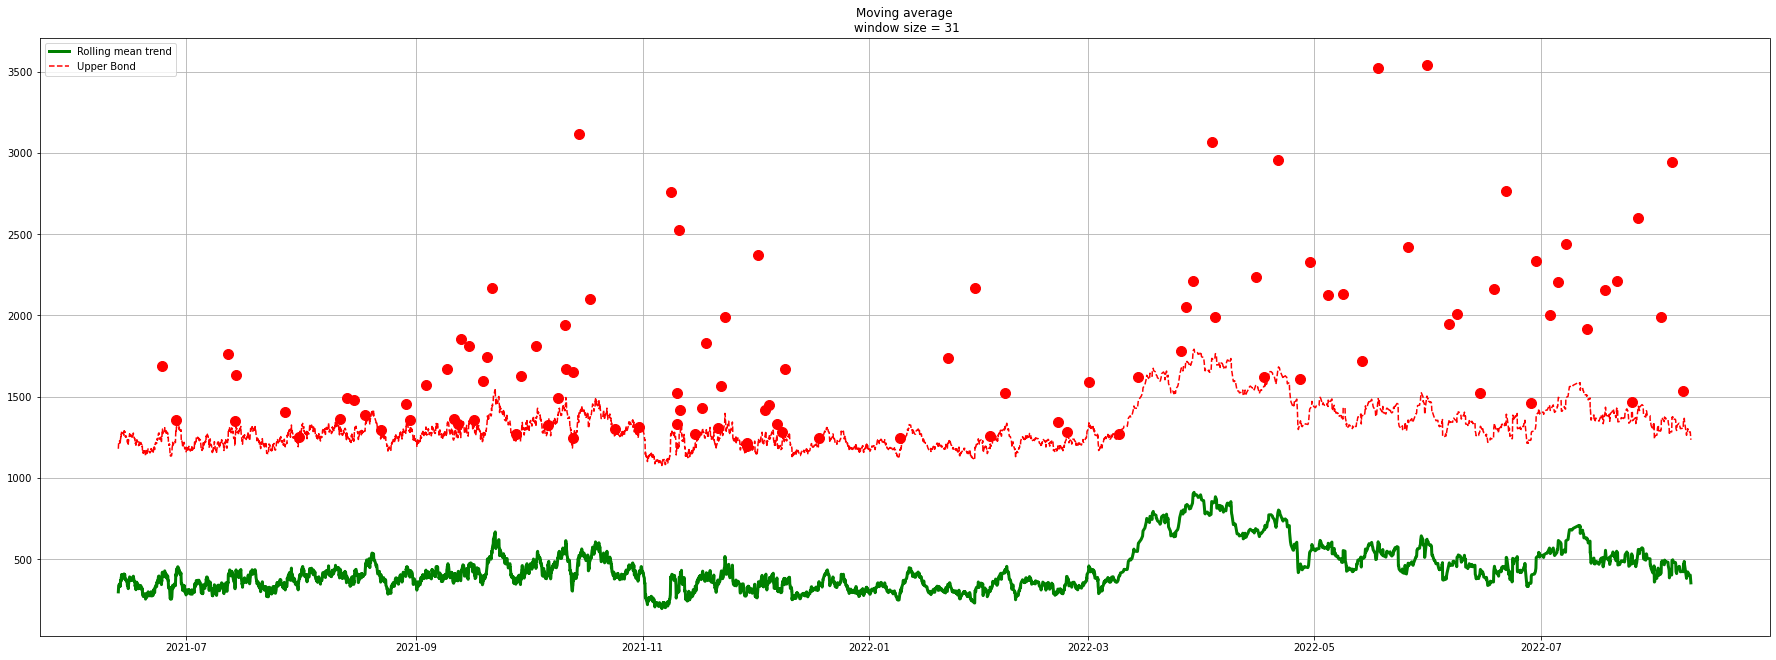

In [15]:
plotMovingAverage(ts, 31, plot_intervals=True, plot_anomalies=True)

In [16]:
posts.head()

,owner_id,date,text,likes,reposts,attachments,marked_as_ads,likes_id
id,,,,,,,,
132780,-194512826,2022-08-01 20:59:16,Наш лукбук на август!\n\nМы собрали универсаль...,521,196,"[{'type': 'photo', 'photo': {'album_id': 28711...",0,"[272301594, 684198901, 557160612, 401227645, 6..."
133540,-194512826,2022-08-10 10:03:00,несмотря на то что в детстве тебя гнобили и ун...,103,9,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[410793517, 616126528, 560812373, 417061866, 4..."
133527,-194512826,2022-08-10 08:03:00,что-то не на рукожопском,359,55,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[84261400, 608143054, 386867124, 467120708, 49..."
133520,-194512826,2022-08-10 07:03:01,такую только на руки и сразу в загс,189,12,"[{'type': 'photo', 'photo': {'album_id': 28226...",0,"[539309607, 698827901, 612743278, 695332193, 5..."
133517,-194512826,2022-08-10 06:03:00,едете с друзьями в санаторий с джакузи и кисло...,179,23,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[348806758, 586377905, 371947448, 612743278, 4..."


1. Leave only one photo as attachment
2. Get classes of items by albums



In [17]:
bad_indices = list((posts.attachments == -1).values.nonzero()[0])

In [18]:
posts = posts.reset_index().drop(bad_indices, axis=0).reset_index().drop(columns='index')
posts

,id,owner_id,date,text,likes,reposts,attachments,marked_as_ads,likes_id
0,132780,-194512826,2022-08-01 20:59:16,Наш лукбук на август!\n\nМы собрали универсаль...,521,196,"[{'type': 'photo', 'photo': {'album_id': 28711...",0,"[272301594, 684198901, 557160612, 401227645, 6..."
1,133540,-194512826,2022-08-10 10:03:00,несмотря на то что в детстве тебя гнобили и ун...,103,9,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[410793517, 616126528, 560812373, 417061866, 4..."
2,133527,-194512826,2022-08-10 08:03:00,что-то не на рукожопском,359,55,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[84261400, 608143054, 386867124, 467120708, 49..."
3,133520,-194512826,2022-08-10 07:03:01,такую только на руки и сразу в загс,189,12,"[{'type': 'photo', 'photo': {'album_id': 28226...",0,"[539309607, 698827901, 612743278, 695332193, 5..."
4,133517,-194512826,2022-08-10 06:03:00,едете с друзьями в санаторий с джакузи и кисло...,179,23,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[348806758, 586377905, 371947448, 612743278, 4..."
...,...,...,...,...,...,...,...,...,...
4938,101107,-194512826,2021-06-11 12:05:00,Милые платья 🦄\n\n•ссылки под фото•,110,21,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[119762390, 135379665, 142625120, 147378685, 1..."
4939,101096,-194512826,2021-06-11 11:03:00,твоя комната как фото из пинтереста\n\n•ссылки...,855,129,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[23426190, 43549117, 64792882, 65158804, 68471..."
4940,101089,-194512826,2021-06-11 10:07:00,милый топ с китти💓\n\n•ссылка под первым фото•,215,80,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[15940170, 57638446, 168711934, 175500238, 197..."
4941,101084,-194512826,2021-06-11 09:05:01,🙋🏼‍♀️🙋🏼‍♀️\n\n•ссылки под фото•,129,26,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[57638446, 96134138, 140293734, 144128826, 152..."


Deleting posts with less when 3 attachments

In [19]:
bad_indices = []
for idx in range(posts.shape[0]):
    if len(posts.iloc[idx].attachments) < 3:
        bad_indices.append(idx)
    else:
        for attachment in posts.iloc[idx].attachments:
            if attachment['type'] != 'photo':
                bad_indices.append(idx)

In [20]:
posts = posts.drop(bad_indices)

In [21]:
posts = posts.reset_index().drop(columns='index')

In [22]:
posts

,id,owner_id,date,text,likes,reposts,attachments,marked_as_ads,likes_id
0,133540,-194512826,2022-08-10 10:03:00,несмотря на то что в детстве тебя гнобили и ун...,103,9,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[410793517, 616126528, 560812373, 417061866, 4..."
1,133527,-194512826,2022-08-10 08:03:00,что-то не на рукожопском,359,55,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[84261400, 608143054, 386867124, 467120708, 49..."
2,133520,-194512826,2022-08-10 07:03:01,такую только на руки и сразу в загс,189,12,"[{'type': 'photo', 'photo': {'album_id': 28226...",0,"[539309607, 698827901, 612743278, 695332193, 5..."
3,133517,-194512826,2022-08-10 06:03:00,едете с друзьями в санаторий с джакузи и кисло...,179,23,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[348806758, 586377905, 371947448, 612743278, 4..."
4,133490,-194512826,2022-08-09 19:03:00,вайбы этого лета✨,186,16,"[{'type': 'photo', 'photo': {'album_id': 28226...",0,"[139471744, 612743278, 560812373, 325298462, 4..."
...,...,...,...,...,...,...,...,...,...
4330,101107,-194512826,2021-06-11 12:05:00,Милые платья 🦄\n\n•ссылки под фото•,110,21,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[119762390, 135379665, 142625120, 147378685, 1..."
4331,101096,-194512826,2021-06-11 11:03:00,твоя комната как фото из пинтереста\n\n•ссылки...,855,129,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[23426190, 43549117, 64792882, 65158804, 68471..."
4332,101089,-194512826,2021-06-11 10:07:00,милый топ с китти💓\n\n•ссылка под первым фото•,215,80,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[15940170, 57638446, 168711934, 175500238, 197..."
4333,101084,-194512826,2021-06-11 09:05:01,🙋🏼‍♀️🙋🏼‍♀️\n\n•ссылки под фото•,129,26,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[57638446, 96134138, 140293734, 144128826, 152..."


In [35]:
all_likes_id = [x for x in itertools.chain(*list(posts.likes_id.values))]

In [36]:
len(all_likes_id)

1880732

In [37]:
print(f"{len(set(all_likes_id))} unique users in the dataset")

129733 unique users in the dataset


In [38]:
counter = Counter(all_likes_id)

In [39]:
def rakesh_by_index(l):
    return [i[1] for i in l]

In [40]:
c = counter.most_common()

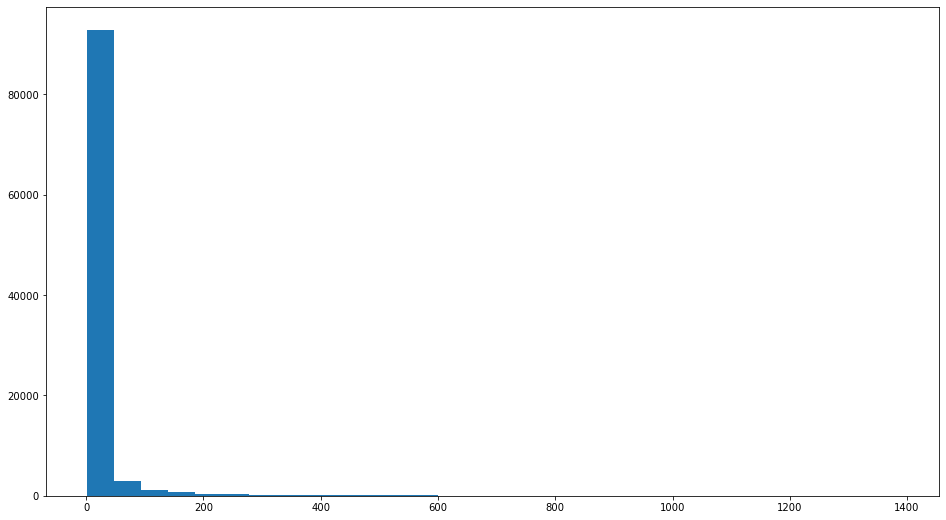

In [41]:
plt.figure(figsize=(16,9))
plt.hist(rakesh_by_index(c)[50:-30000], bins=30)
plt.show()

In [42]:
Counter(rakesh_by_index(c)).most_common()

[(1, 63787),
 (2, 17944),
 (3, 8970),
 (4, 5568),
 (5, 3997),
 (6, 2939),
 (7, 2283),
 (8, 1895),
 (9, 1569),
 (10, 1363),
 (11, 1175),
 (12, 952),
 (13, 856),
 (14, 753),
 (15, 676),
 (16, 594),
 (17, 532),
 (18, 508),
 (19, 482),
 (20, 410),
 (21, 400),
 (22, 372),
 (23, 366),
 (25, 287),
 (24, 287),
 (27, 283),
 (26, 260),
 (29, 254),
 (28, 233),
 (30, 228),
 (32, 211),
 (31, 199),
 (34, 195),
 (35, 187),
 (33, 185),
 (37, 178),
 (36, 162),
 (38, 144),
 (42, 140),
 (40, 140),
 (43, 139),
 (41, 136),
 (39, 134),
 (47, 127),
 (45, 127),
 (46, 119),
 (44, 107),
 (56, 106),
 (49, 106),
 (50, 104),
 (52, 98),
 (53, 95),
 (48, 94),
 (55, 93),
 (51, 91),
 (57, 90),
 (54, 85),
 (60, 82),
 (59, 74),
 (61, 73),
 (58, 72),
 (72, 71),
 (65, 71),
 (66, 67),
 (69, 65),
 (64, 65),
 (67, 64),
 (63, 63),
 (68, 61),
 (62, 60),
 (78, 59),
 (80, 57),
 (70, 57),
 (75, 56),
 (71, 56),
 (73, 55),
 (86, 52),
 (74, 50),
 (85, 49),
 (95, 46),
 (92, 46),
 (89, 46),
 (87, 46),
 (79, 46),
 (76, 46),
 (81, 45),


In [45]:
posts.to_pickle("data/posts_cleared.pkl")

In [43]:
url = f"https://api.vk.com/method/users.get"
req = requests.get(url, params={
    'access_token': token,
    'user_ids': str(all_likes_id[:100])[1:-1],
    'fields': 'photo_id',
    'v': 5.131,
})
df = pd.DataFrame.from_dict(req.json()['response'])
df

,id,photo_id,first_name,last_name,can_access_closed,is_closed
0,410793517,410793517_457260452,Соня,Свид,True,False
1,616126528,616126528_457240136,Анна,Рязанцева,True,False
2,560812373,NaN,Лиза,Гурьянова,True,False
3,417061866,417061866_457265409,Марьям,Шалчиан,True,False
4,453169248,453169248_457242797,Варвара,Слобожанинова,True,False
...,...,...,...,...,...,...
95,591228632,591228632_457269559,Алина,Полякова,True,False
96,456368005,NaN,Alina,Stepanova,False,True
97,580690525,NaN,Ольга,Никулина,False,True
98,668770858,668770858_457239537,Лера,Бебрич,True,False


In [82]:
for idx, i in enumerate(tqdm(range(100, 100000, 100))):
    if idx%3 == 0:
        sleep(1)
        
    url = f"https://api.vk.com/method/users.get"
    req = requests.get(url, params={
        'access_token': token,
        'user_ids': str(all_likes_id[i:i+100])[1:-1],
        'fields': 'photo_id',
        'v': 5.131,
    })
    
    df = pd.concat([df, pd.DataFrame.from_dict(req.json()['response'])])
    print(df.shape[0], end=', ')

  0%|          | 0/999 [00:00<?, ?it/s]

535, 635, 735, 835, 935, 1035, 1135, 1230, 1330, 1426, 1526, 1626, 1726, 1826, 1926, 2026, 2126, 2226, 2326, 2426, 2526, 2626, 2724, 2824, 2924, 3024, 3124, 3223, 3323, 3423, 3523, 3623, 3723, 3823, 3923, 4023, 4122, 4222, 4322, 4422, 4522, 4622, 4722, 4822, 4921, 5021, 5121, 5221, 5321, 5421, 5521, 5621, 5721, 5821, 5921, 6021, 6121, 6221, 6321, 6421, 6521, 6621, 6721, 6821, 6921, 7021, 7121, 7221, 7321, 7421, 7521, 7621, 7721, 7821, 7921, 8021, 8121, 8191, 8291, 8391, 8491, 8591, 8691, 8788, 8888, 8988, 9088, 9188, 9287, 9387, 9487, 9587, 9687, 9787, 9887, 9987, 10087, 10187, 10287, 10387, 10487, 10587, 10687, 10787, 10887, 

KeyboardInterrupt: 

In [48]:
df = df.reset_index().drop(columns='index')
df

,id,photo_id,first_name,last_name,can_access_closed,is_closed,deactivated
0,410793517,410793517_457260452,Соня,Свид,True,False,NaN
1,616126528,616126528_457240136,Анна,Рязанцева,True,False,NaN
2,560812373,NaN,Лиза,Гурьянова,True,False,NaN
3,417061866,417061866_457265409,Марьям,Шалчиан,True,False,NaN
4,453169248,453169248_457242797,Варвара,Слобожанинова,True,False,NaN
...,...,...,...,...,...,...,...
990,550768610,550768610_457245355,Анечка,Шихова,True,False,NaN
991,555277302,555277302_457269241,Ольга,Ломакова,True,False,NaN
992,558113427,558113427_457241797,Велиса,Пивнева,True,False,NaN
993,563144161,NaN,Рина,Шутова,False,True,NaN


In [49]:
df.photo_id.isna().sum()

298

67% of opened accounts

In [51]:
df.deactivated.isna().sum()

993

In [ ]:
ids_with_photos = df[~df['photo_id'].isnull()][['id', 'photo_id']].set_index('id').to_dict()['photo_id']

In [102]:
url = f"https://api.vk.com/method/users.get"
req = requests.get(url, params={
    'access_token': token,
    'user_ids': str(list(set(all_likes_id))[:1000])[1:-1],
    'fields': 'photo_200',
    'v': 5.131
})
df = pd.DataFrame.from_dict(req.json()['response']).drop(columns=['deactivated', 'can_access_closed', 'is_closed', 'first_name', 'last_name'])
df

,id,photo_200
0,319029248,https://sun9-74.userapi.com/s/v1/ig2/nRs7DP8_Q...
1,535298051,https://sun9-11.userapi.com/s/v1/ig2/2xnNe0aP5...
2,292552710,https://sun9-10.userapi.com/s/v1/ig2/COT_vRqze...
3,576716806,https://sun9-36.userapi.com/s/v1/ig2/eWnrrjXHD...
4,634912780,https://sun9-37.userapi.com/s/v1/ig2/3xMW0bpKq...
...,...,...
995,653264884,https://sun9-4.userapi.com/s/v1/ig2/yJa-iDtiwk...
996,637798390,https://sun9-83.userapi.com/s/v1/ig2/T2bNTtwPV...
997,185599997,https://sun9-69.userapi.com/s/v1/ig2/Tmd85twdt...
998,304875524,https://sun9-14.userapi.com/s/v1/ig2/EXEoa1iEk...


In [103]:
for idx, i in enumerate(tqdm(range(1000, 100000, 1000))):
    if idx%3 == 0:
        sleep(1)
        
    url = f"https://api.vk.com/method/users.get"
    req = requests.get(url, params={
        'access_token': token,
        'user_ids': str(list(set(all_likes_id))[i:i+1000])[1:-1],
        'fields': 'photo_200',
        'v': 5.131
    })
    df_addition = pd.DataFrame.from_dict(req.json()['response']).drop(columns=['deactivated', 'can_access_closed', 'is_closed', 'first_name', 'last_name'])
    df = pd.concat([df, df_addition])

  0%|          | 0/99 [00:00<?, ?it/s]

In [106]:
df = df.set_index('id')
df

,photo_200
id,
319029248,https://sun9-74.userapi.com/s/v1/ig2/nRs7DP8_Q...
535298051,https://sun9-11.userapi.com/s/v1/ig2/2xnNe0aP5...
292552710,https://sun9-10.userapi.com/s/v1/ig2/COT_vRqze...
576716806,https://sun9-36.userapi.com/s/v1/ig2/eWnrrjXHD...
634912780,https://sun9-37.userapi.com/s/v1/ig2/3xMW0bpKq...
...,...
182129573,https://sun9-23.userapi.com/s/v1/ig2/hPJtF9SvK...
243471272,https://sun9-5.userapi.com/s/v1/ig2/3Orjy8uVcH...
543888297,https://sun9-38.userapi.com/s/v1/ig2/kuuFLUCaB...


In [112]:
img_data = requests.get(df.iloc[0].photo_200).content

In [114]:
with open('image_name.jpg', 'wb') as handler:
    handler.write(img_data)

In [ ]:
def download_img(path):
    img_data = requests.get(path).content
    with open(f'image_name.jpg', 'wb') as handler:
        handler.write(img_data)

In [126]:
for i in tqdm(range(len(df))):
    path = df.iloc[i].photo_200
    user_id = df.iloc[i].name
    img_data = requests.get(path).content
    with open(f'photos/{user_id}.jpg', 'wb') as handler:
        handler.write(img_data)    

  0%|          | 0/100000 [00:00<?, ?it/s]

In [324]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
import pymorphy2
import re

nltk.download('words')

def clean_text(text):
    # Remove some bad symbols
    text = re.sub(r"\n", " ", text)

    # Lower case everything
    text = text.lower()
    
        # удаляем ненужные слова и ссылки
    text = re.sub(r"ссылки|фото|pov|лук|пов", " ", text)
    text = re.sub(r"https?://[^,\s]+,?", " ", text) 
    
    # оставить только буквы
    text = re.sub(r"[^A-Za-zА-Яа-яё]", " ", text)
    
    # tokenizing
    tokens = TreebankWordTokenizer().tokenize(text)

    # remove stop words
    stop_words = stopwords.words("russian")
    tokens = [token for token in tokens if token not in stop_words]
    
    # lemmatize
    #morph = pymorphy2.MorphAnalyzer()
    #tokens = [morph.parse(token)[0].normal_form for token in tokens]

    # make a text
    text = " ".join(tokens)
    return text
    

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Роман\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [325]:
posts['clean_text'] = posts.text.apply(clean_text)

In [326]:
posts

,id,owner_id,date,text,likes,reposts,attachments,marked_as_ads,likes_id,clean_text
0,133540,-194512826,2022-08-10 10:03:00,несмотря на то что в детстве тебя гнобили и ун...,103,9,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[410793517, 616126528, 560812373, 417061866, 4...",несмотря детстве гнобили унижали выросла увере...
1,133527,-194512826,2022-08-10 08:03:00,что-то не на рукожопском,359,55,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[84261400, 608143054, 386867124, 467120708, 49...",рукожопском
2,133520,-194512826,2022-08-10 07:03:01,такую только на руки и сразу в загс,189,12,"[{'type': 'photo', 'photo': {'album_id': 28226...",0,"[539309607, 698827901, 612743278, 695332193, 5...",такую руки сразу загс
3,133517,-194512826,2022-08-10 06:03:00,едете с друзьями в санаторий с джакузи и кисло...,179,23,"[{'type': 'photo', 'photo': {'album_id': 27455...",0,"[348806758, 586377905, 371947448, 612743278, 4...",едете друзьями санаторий джакузи кислородными ...
4,133490,-194512826,2022-08-09 19:03:00,вайбы этого лета✨,186,16,"[{'type': 'photo', 'photo': {'album_id': 28226...",0,"[139471744, 612743278, 560812373, 325298462, 4...",вайбы лета
...,...,...,...,...,...,...,...,...,...,...
4330,101107,-194512826,2021-06-11 12:05:00,Милые платья 🦄\n\n•ссылки под фото•,110,21,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[119762390, 135379665, 142625120, 147378685, 1...",милые платья
4331,101096,-194512826,2021-06-11 11:03:00,твоя комната как фото из пинтереста\n\n•ссылки...,855,129,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[23426190, 43549117, 64792882, 65158804, 68471...",твоя комната пинтереста
4332,101089,-194512826,2021-06-11 10:07:00,милый топ с китти💓\n\n•ссылка под первым фото•,215,80,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[15940170, 57638446, 168711934, 175500238, 197...",милый топ китти ссылка первым
4333,101084,-194512826,2021-06-11 09:05:01,🙋🏼‍♀️🙋🏼‍♀️\n\n•ссылки под фото•,129,26,"[{'type': 'photo', 'photo': {'album_id': -7, '...",0,"[57638446, 96134138, 140293734, 144128826, 152...",


In [351]:
posts.to_pickle("data/posts_cleared.pkl")

In [357]:
a = [1,2,3]

In [358]:
b = a[:]
b.append(2)
a

[1, 2, 3]

In [359]:
b

[1, 2, 3, 2]